## Linear Regression(1 Feature)

()


/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_7976/3944141714.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut = N)


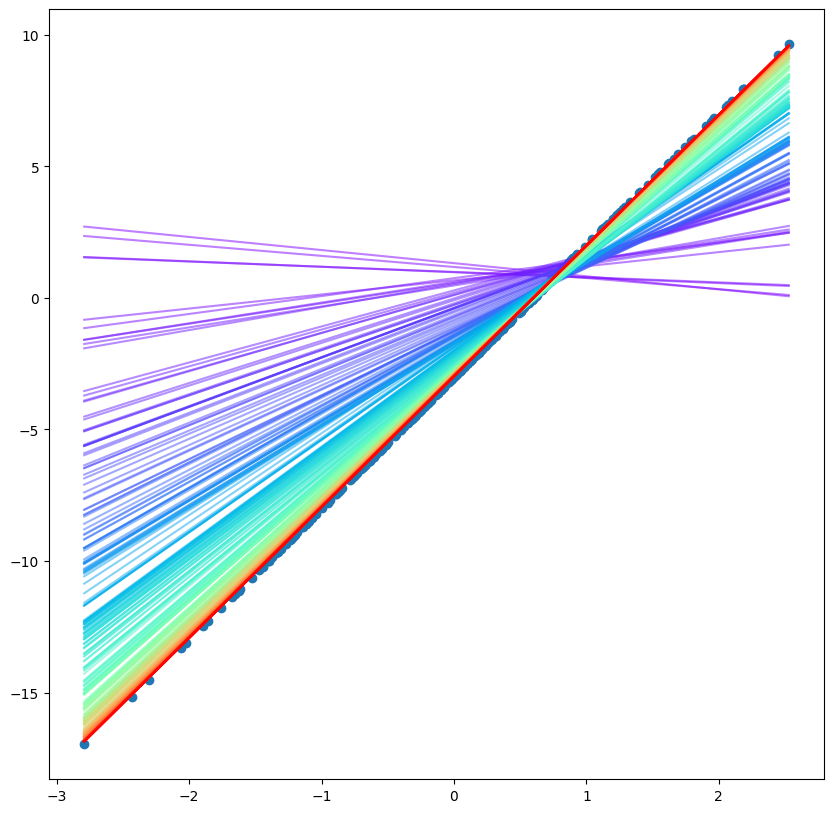

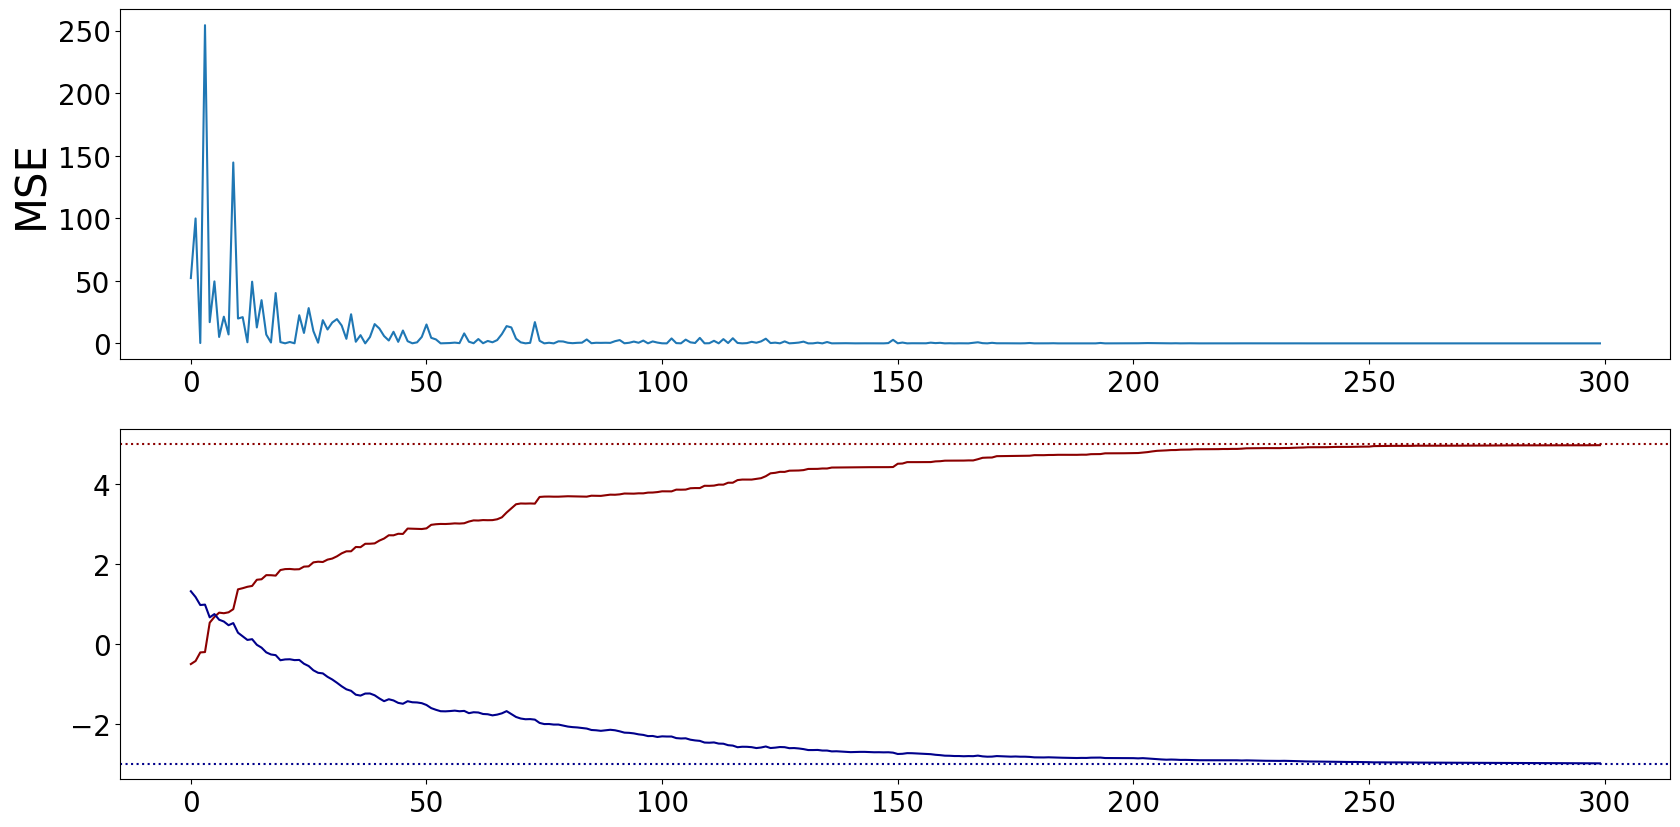

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)

# set params
N = 300
lr = 0.01
t_w, t_b = 5, -3
w, b = np.random.uniform(-3, 3, 2)
print(w.shape)
# generate dataset 
x_data = np.random.randn(N, )
y_data = x_data * t_w + t_b
# y_data += 0.5 * np.random.randn(N) # add Noise

# visualize dataset
cmap = cm.get_cmap('rainbow', lut = N)
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(x_data, y_data)


x_range = np.array([x_data.min(), x_data.max()])
J_track = list()
w_track, b_track = list(), list()

# train model and visualize updated models
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)
    
    # visualize updated model
    y_range = w * x_range + b
    ax.plot(x_range, y_range, color = cmap(data_idx), alpha = 0.5)
    
    # forward propagation
    pred = x * w + b
    J = (y - pred)**2
    J_track.append(J)
    
    # jacobians
    dJ_dpred = -2*(y-pred)
    dpred_dw = x
    dpred_db = 1
    
    # backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db
    
    # parameter update
    # w = w - lr * dJ_dw
    # b = b - lr * dJ_db
    w = w + 2*lr*x*(y-pred)
    b = b + 2*lr*(y-pred)
    
# visualize result
fig, axes = plt.subplots(2, 1, figsize = (20 ,10))
axes[0].plot(J_track)
axes[1].plot(w_track, color = 'darkred')
axes[1].plot(b_track, color = 'darkblue')
    
axes[0].set_ylabel('MSE', fontsize = 30)
axes[0].tick_params(labelsize = 20)

axes[1].axhline(y=t_w, color = 'darkred', linestyle = ':')
axes[1].axhline(y=t_b, color = 'darkblue', linestyle = ':')
axes[1].tick_params(labelsize = 20)

## Linear Regression(N feature)

/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_7976/1857125829.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut = n_feature)


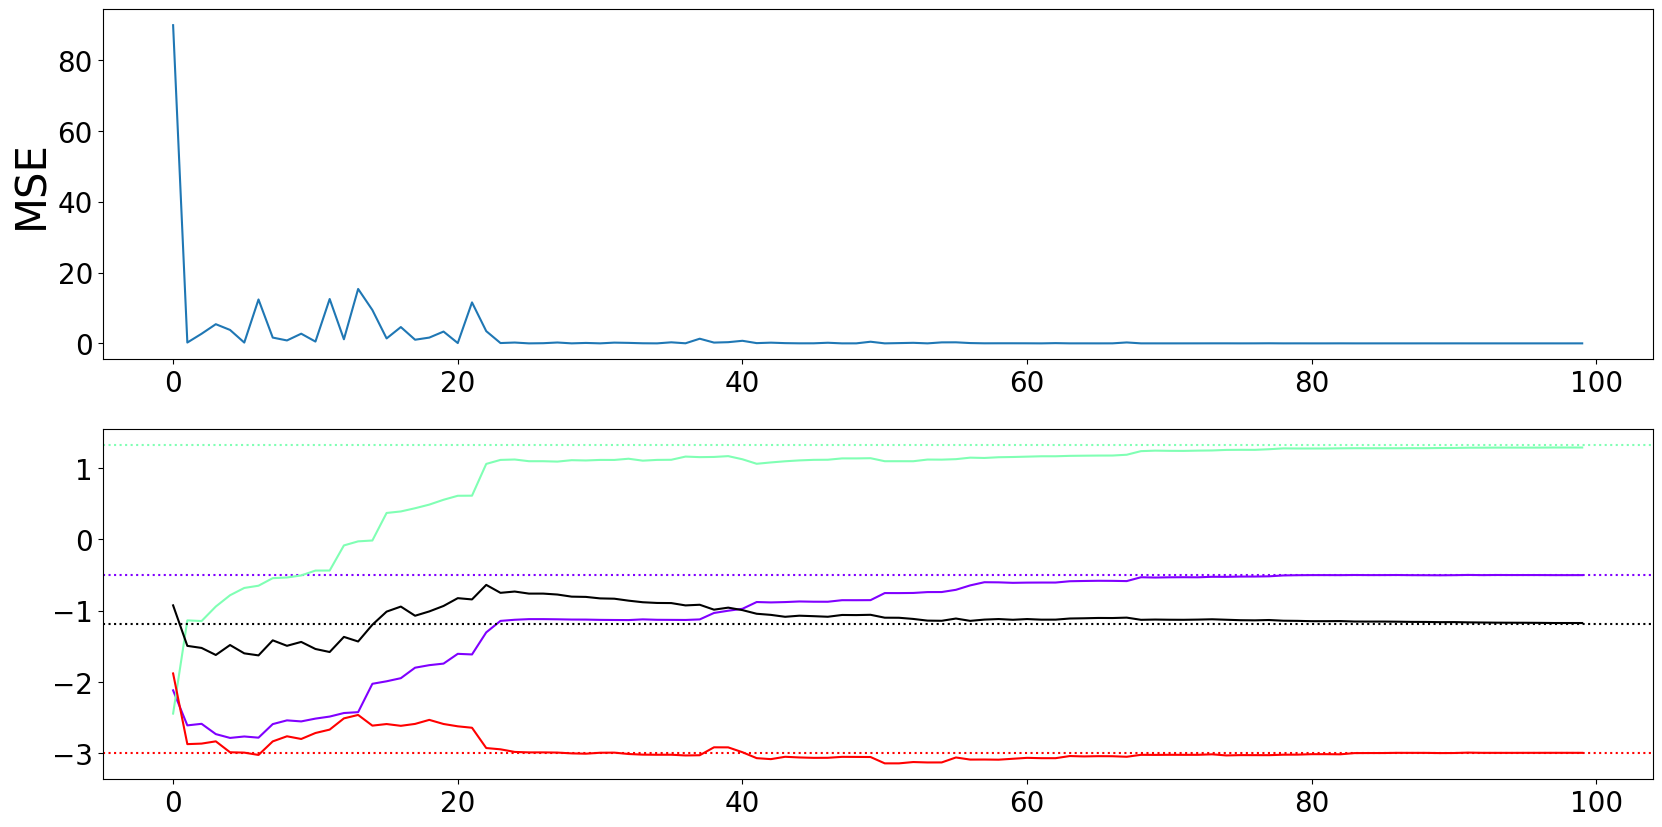

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)

# set params
N, n_feature = 100, 3
lr = 0.03
t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, ))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, 1))

# generate dataset
x_data = np.random.randn(N, n_feature)
# print(x_data.shape, t_W.shape, t_b.shape)
# y_data = np.matmul(X, t_W) + t_b
y_data = x_data @ t_W + t_b

# print(x_data.shape, y_data.shape) 


J_track = list()
W_track, b_track = list(), list()
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    # print(X.shape, y.shape)
    # print(b.shape)
    W_track.append(W)
    b_track.append(b)
    
    # forward propagation
    X = X.reshape(1, -1)
    # print(X.shape, W.shape, b.shape)
    pred = X @ W + b
    # print(y.shape, pred.shape)
    J = (y - pred)**2
    # print(J.squeeze().shape)
    J_track.append(J.squeeze())
    
    # jacobians
    dJ_dpred = -2 * (y - pred)
    # dpred_dW = X.T # Transpose
    dpred_dW = X
    dpred_db = 1
    # print(dJ_dpred.shape, dpred_dW.shape, dpred_db)
    
    
    # backpropagation
    dJ_dW = dJ_dpred * dpred_dW
    dJ_db = dJ_dpred * dpred_db
    # print(dJ_dW.shape, dJ_db.shape)
    
    # parameter update
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db.T
    # print(b.shape)
    # break
# print(len(W_track))
# print(W_track[0].shape)

W_track = np.hstack(W_track)
# print(b_track[0].shape)
b_track = np.concatenate(b_track).flatten()


# visualize results
fig, axes = plt.subplots(2, 1, figsize = (20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize = 30)
axes[0].tick_params(labelsize = 20)

cmap = cm.get_cmap('rainbow', lut = n_feature)

for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y=t_w, color = cmap(w_idx), linestyle = ':')
    axes[1].plot(w, color = cmap(w_idx))
axes[1].axhline(y=t_b, color = 'black', linestyle=':')
axes[1].plot(b_track, color = 'black')
axes[1].tick_params(labelsize = 20)


    

    
    
    

